# Data Engineering

- Read the Data

In [15]:
import pandas as pd
import holidays
from datetime import date

In [16]:
attendanceDF=pd.read_csv('attendance.csv')
entityDF=pd.read_csv('entity_schedule.csv')
attractionDF = pd.read_csv('link_attraction_park.csv', delimiter=';')
weatherDF=pd.read_csv('weather_data.csv')
paradeDF=pd.read_excel('parade_night_show.xlsx')
glossaryDF=pd.read_excel('glossary.xlsx')

In [17]:
paradeDF.drop(['Unnamed: 0'], inplace=True, axis=1)

## Merge the Dataset

#### Hourly Base: Weather + waiting time+ night show 


#### Daily Base: Attendance+ entity schedule + Link attraction

Link Attraction 

In [36]:
#select the PortAventura World park
port_attraction_DF=attractionDF[attractionDF['PARK']=='PortAventura World']
#count the unique attraction of the park 
print(port_attraction_DF['PARK'].value_counts())

PortAventura World    26
Name: PARK, dtype: int64


- the port_attraction_DF will be use to select entity that belongs to PortAventura

Entity 

In [34]:
#rename the ENTITY_DESCRIPTION_SHORT to attraction 
entityDF.rename(columns={'ENTITY_DESCRIPTION_SHORT':'Attraction'}, inplace=True)
entityDF['WORK_DATE']=pd.to_datetime(entityDF['WORK_DATE'], format='%Y-%m-%d')

#select the Attraction colums that == PortAventura World
entity_port=entityDF[entityDF['Attraction']=='PortAventura World']

#select the Attraction colums that == to port_attraction_DF, othwerwise drop the row
entity_DF=entityDF[entityDF['Attraction'].isin(port_attraction_DF['ATTRACTION'])]

#merge the entity_port and entity_DF on attraction
entity_merge_DF=pd.concat([entity_port, entity_DF])

- So in the end this entity_merge_DF only contains PortAventura World theme park data

In [38]:
#sort the entity_merge_DF by date 
entity_merge_DF=entity_merge_DF.sort_values(by='WORK_DATE')
entity_merge_DF

,REF_CLOSING_DESCRIPTION,Attraction,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
21180,NaN,Spiral Slide,ATTR,2018-01-01 08:30:00.000,2018-01-01 18:29:00.000,2018-01-02 07:53:26.000,2018-01-01
6310,NaN,Kiddie Coaster,ATTR,2018-01-01 10:00:00.000,2018-01-01 17:07:00.000,2018-01-02 07:51:31.000,2018-01-01
34217,NaN,Rapids Ride,ATTR,2018-01-01 09:29:00.000,2018-01-01 17:08:00.000,2018-01-02 07:51:31.000,2018-01-01
9678,NaN,PortAventura World,PARK,2018-01-01 10:00:00.000,2018-01-01 22:00:00.000,2018-01-02 07:57:06.000,2018-01-01
8237,NaN,Roller Coaster,ATTR,2018-01-01 10:00:00.000,2018-01-01 17:44:00.000,2018-01-02 07:46:01.000,2018-01-01
...,...,...,...,...,...,...,...
38075,NaN,Giant Wheel,ATTR,2022-08-22 08:30:00.000,2022-08-22 23:25:00.000,2022-08-23 09:02:41.000,2022-08-22
38073,NaN,Bumper Cars,ATTR,2022-08-22 09:00:00.000,2022-08-22 22:15:00.000,2022-08-23 09:02:40.000,2022-08-22
38072,NaN,Superman Ride,ATTR,2022-08-22 09:30:00.000,2022-08-22 19:50:00.000,2022-08-23 09:02:41.000,2022-08-22
38070,NaN,PortAventura World,PARK,2022-08-22 09:30:00.000,2022-08-22 23:00:00.000,2022-08-23 09:02:48.000,2022-08-22


Attendance

In [37]:
#Only choose the PortAventura World
PortAventuraAttendanceDF=attendanceDF[attendanceDF['FACILITY_NAME']=='PortAventura World']
PortAventuraAttendanceDF['USAGE_DATE']=pd.to_datetime(PortAventuraAttendanceDF['USAGE_DATE'], format='%Y-%m-%d')

# # adding the date of the week to the Port dataset
# PortAventuraAttendanceDF['DayOfWeek']=PortAventuraAttendanceDF['USAGE_DATE'].dt.dayofweek

# # Weekdays DataFrame (Monday=0, ..., Friday=4)
# WeekdayPortAttendanceDF= PortAventuraAttendanceDF[PortAventuraAttendanceDF['DayOfWeek'].isin(range(5))]

# # Weekends DataFrame (Saturday=5, Sunday=6)
# WEndPortAttendanceDF= PortAventuraAttendanceDF[PortAventuraAttendanceDF['DayOfWeek'].isin([5,6])]

/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_20799/4060445122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PortAventuraAttendanceDF['USAGE_DATE']=pd.to_datetime(PortAventuraAttendanceDF['USAGE_DATE'], format='%Y-%m-%d')


#### Encoding Public Holidays=1; Weekend=1, otherwise =0 for Entity dataset 

In [35]:
# Get the Spanish Holidays
holidays18 = holidays.Spain(years=[2018])
holidays19 = holidays.Spain(years=[2019])
holidays20 = holidays.Spain(years=[2020])
holidays21 = holidays.Spain(years=[2021])
holidays22 = holidays.Spain(years=[2022])
holidays23 = holidays.Spain(years=[2023])

# Convert to a list
holiday_dates = list(holidays18) + \
                list(holidays19) + \
                list(holidays20) + \
                list(holidays21) + \
                list(holidays22) + \
                list(holidays23)


In [39]:
# Add an Holidays column for attendance , if is holiday ==1, otherwise ==0
PortAventuraAttendanceDF['Holidays']=PortAventuraAttendanceDF['USAGE_DATE'].isin(holiday_dates).astype(int)
# Add an Weekends column for attendance , if is weekend ==1, otherwise ==0
PortAventuraAttendanceDF['Weekends']=PortAventuraAttendanceDF['USAGE_DATE'].dt.dayofweek.isin([5,6]).astype(int)

PortAventuraAttendanceDF

/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_20799/2629378845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PortAventuraAttendanceDF['Holidays']=PortAventuraAttendanceDF['USAGE_DATE'].isin(holiday_dates).astype(int)
/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_20799/2629378845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PortAventuraAttendanceDF['Weekends']=PortAventuraAttendanceDF['USAGE_DATE'].dt.dayofweek.isin([5,6]).astype(int)


,USAGE_DATE,FACILITY_NAME,attendance,Holidays,Weekends
0,2018-06-01,PortAventura World,46804,0,0
2,2018-06-02,PortAventura World,57940,0,1
4,2018-06-03,PortAventura World,44365,0,1
6,2018-06-04,PortAventura World,37617,0,0
8,2018-06-05,PortAventura World,32438,0,0
...,...,...,...,...,...
2357,2022-07-22,PortAventura World,49586,0,0
2359,2022-07-23,PortAventura World,51748,0,1
2361,2022-07-24,PortAventura World,45261,0,1
2363,2022-07-25,PortAventura World,53764,0,0


Not sure what to do with attendance since is the daily sum attandence, while for entity is the per attraction

# Data Visulization

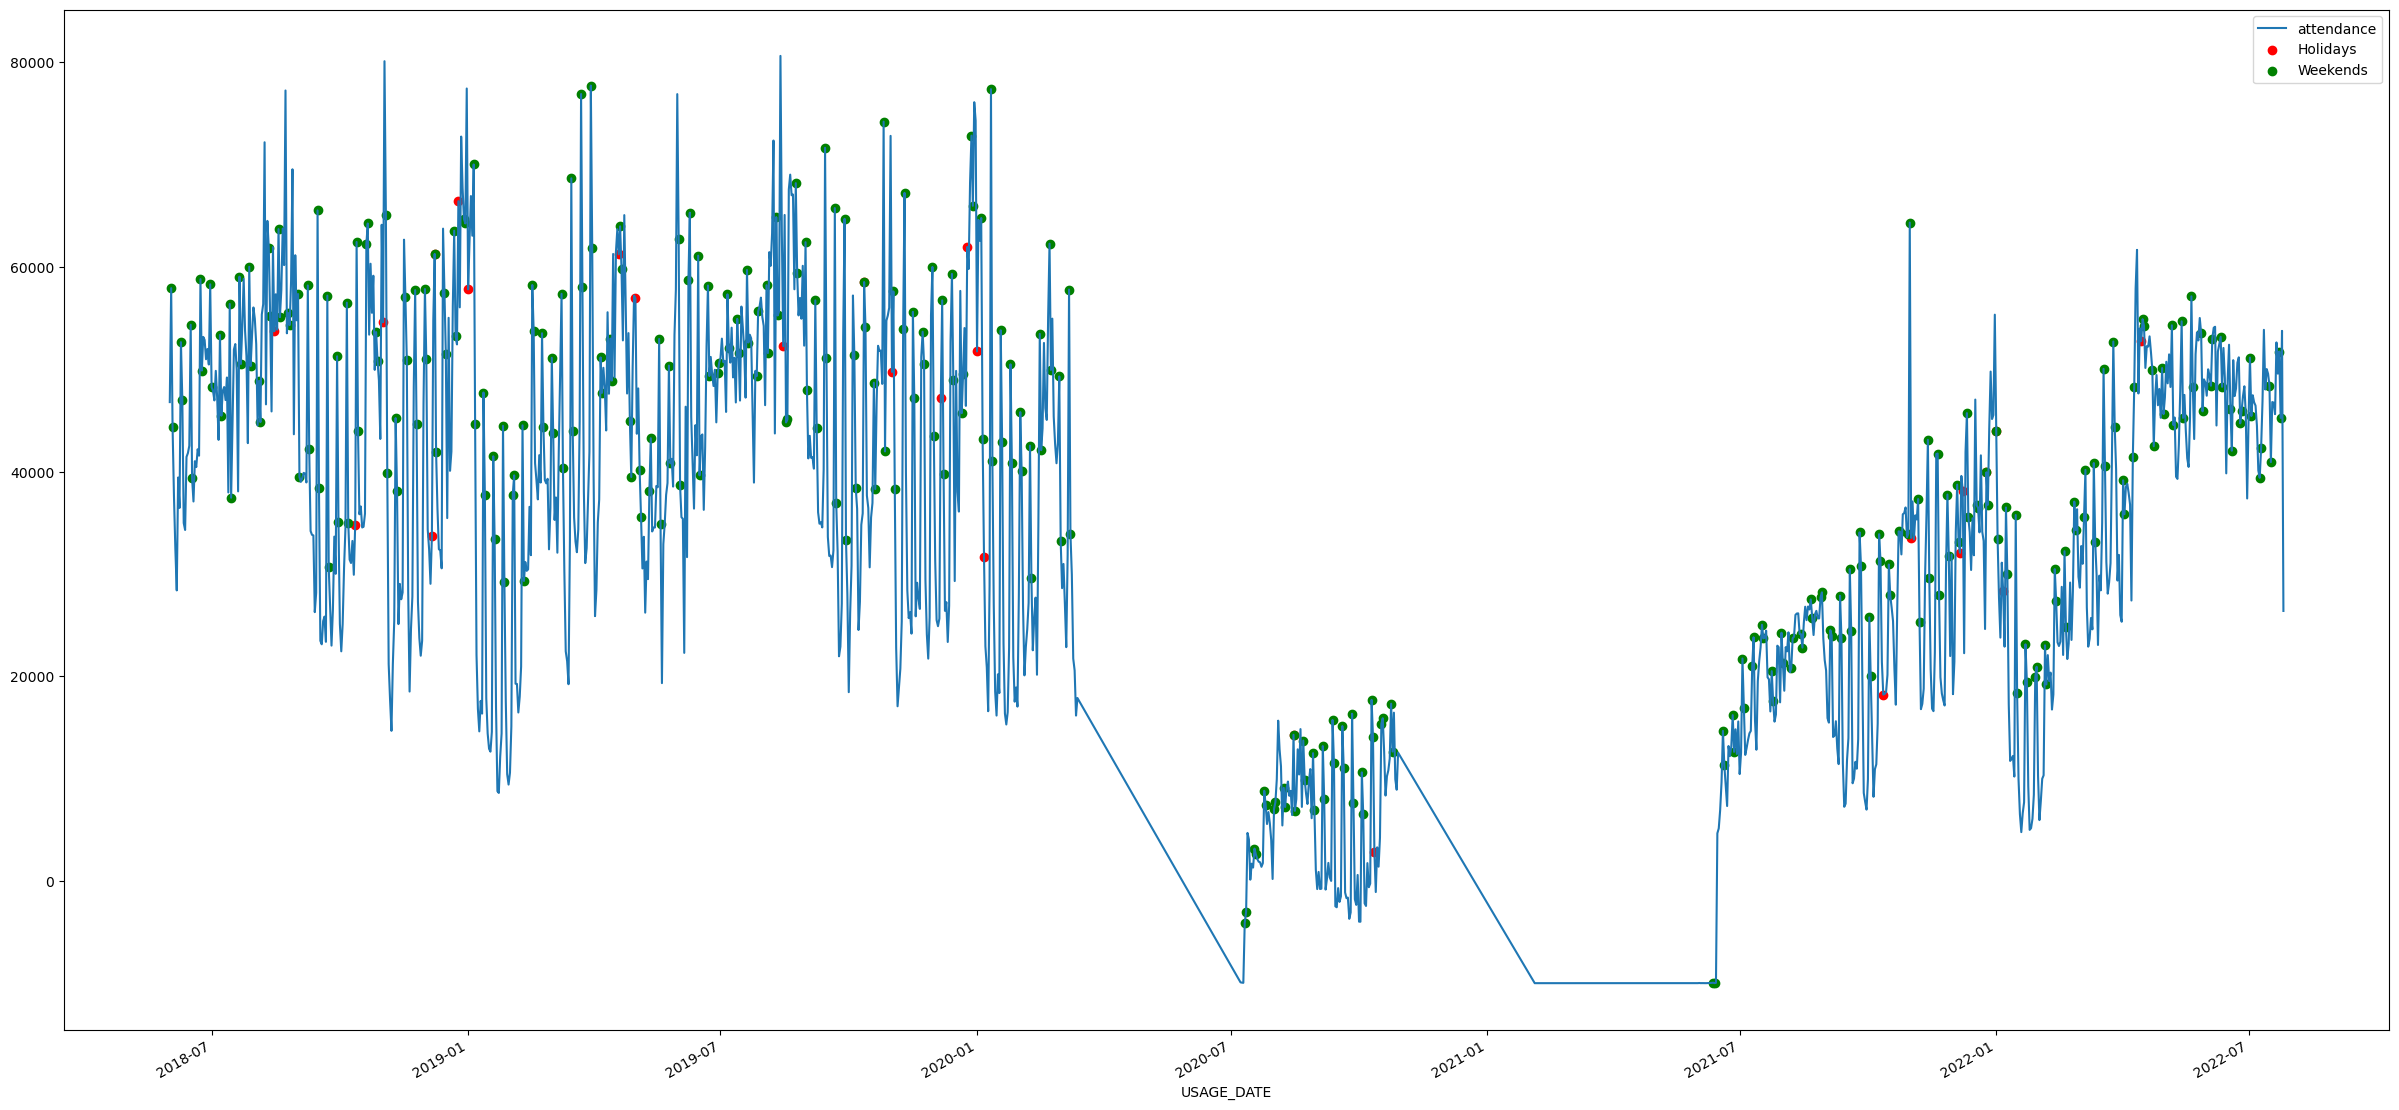

In [60]:
#plot the line of PortAventuraAttendanceDF ,x=USAGE_DATE, y=attendance
import matplotlib.pyplot as plt
PortAventuraAttendanceDF.plot(x='USAGE_DATE', y='attendance', kind='line',figsize=(30, 15))

# Now, plot the holidays to red point in the line
holiday_dates = PortAventuraAttendanceDF[PortAventuraAttendanceDF['Holidays'] == 1]
plt.scatter(holiday_dates['USAGE_DATE'], holiday_dates['attendance'], color='red', label='Holidays')
plt.legend()

# Now, plot the weekends to green point in the line
weekend_dates = PortAventuraAttendanceDF[PortAventuraAttendanceDF['Weekends'] == 1]
plt.scatter(weekend_dates['USAGE_DATE'], weekend_dates['attendance'], color='green', label='Weekends')
plt.legend()

plt.show()


/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_20799/1178130666.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(PortAventuraAttendanceDF.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


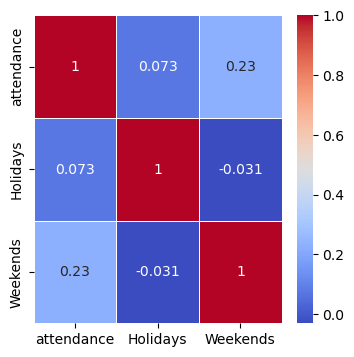

In [65]:
#plot the correlation matrix of PortAventuraAttendanceDF
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(PortAventuraAttendanceDF.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
